# Data loading

In [ ]:
from datasets import load_dataset
import pandas as pd

# Load full ANLI dataset
dataset = load_dataset("facebook/anli", "plain_text")

train = dataset["train_r2"]
val   = dataset["dev_r2"]
test  = dataset["test_r2"]

train, val, test


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

plain_text/train_r1-00000-of-00001.parqu(…):   0%|          | 0.00/3.14M [00:00<?, ?B/s]

plain_text/dev_r1-00000-of-00001.parquet:   0%|          | 0.00/351k [00:00<?, ?B/s]

plain_text/test_r1-00000-of-00001.parque(…):   0%|          | 0.00/353k [00:00<?, ?B/s]

plain_text/train_r2-00000-of-00001.parqu(…):   0%|          | 0.00/6.53M [00:00<?, ?B/s]

plain_text/dev_r2-00000-of-00001.parquet:   0%|          | 0.00/351k [00:00<?, ?B/s]

plain_text/test_r2-00000-of-00001.parque(…):   0%|          | 0.00/362k [00:00<?, ?B/s]

plain_text/train_r3-00000-of-00001.parqu(…):   0%|          | 0.00/14.3M [00:00<?, ?B/s]

plain_text/dev_r3-00000-of-00001.parquet:   0%|          | 0.00/434k [00:00<?, ?B/s]

plain_text/test_r3-00000-of-00001.parque(…):   0%|          | 0.00/435k [00:00<?, ?B/s]

Generating train_r1 split:   0%|          | 0/16946 [00:00<?, ? examples/s]

Generating dev_r1 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test_r1 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating train_r2 split:   0%|          | 0/45460 [00:00<?, ? examples/s]

Generating dev_r2 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating test_r2 split:   0%|          | 0/1000 [00:00<?, ? examples/s]

Generating train_r3 split:   0%|          | 0/100459 [00:00<?, ? examples/s]

Generating dev_r3 split:   0%|          | 0/1200 [00:00<?, ? examples/s]

Generating test_r3 split:   0%|          | 0/1200 [00:00<?, ? examples/s]

(Dataset({
     features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
     num_rows: 45460
 }),
 Dataset({
     features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
     num_rows: 1000
 }),
 Dataset({
     features: ['uid', 'premise', 'hypothesis', 'label', 'reason'],
     num_rows: 1000
 }))

What the dataset contains:

premise → the original statement

hypothesis → the claim being tested

label →

0 = entailment

1 = neutral

2 = contradiction

reason → explanation used by annotators during adversarial generation

context → optional metadata used in collection

uid → unique example ID

In [ ]:
train[0]


{'uid': '245475c4-6225-4f5c-b945-e13e0e988fc8',
 'premise': 'Topi Raja Sweety Roja is a 1996 Telugu comedy film, produced by Dr. A. Vijayalakshmi on Sri Sai Madhavi Productions banner and directed by Dr. N. Siva Prasad. Starring Rajendra Prasad, Roja in the lead roles and music also composed by "Hero" Rajendra Prasad.',
 'hypothesis': 'The lead role was played by Rajendra Prasad',
 'label': 0,
 'reason': ''}

In [ ]:
print("Train size:", len(train))
print("Validation size:", len(val))
print("Test size:", len(test))


Train size: 45460
Validation size: 1000
Test size: 1000


In [ ]:
df_train = pd.DataFrame(train)
df_val   = pd.DataFrame(val)
df_test  = pd.DataFrame(test)

df_train.head()


,uid,premise,hypothesis,label,reason
0,245475c4-6225-4f5c-b945-e13e0e988fc8,Topi Raja Sweety Roja is a 1996 Telugu comedy ...,The lead role was played by Rajendra Prasad,0,
1,5837ee91-4527-45b7-bd03-5f0a495d71af,Idris Sultan (born January 1993) is a Tanzania...,Idris Sultan was born in Tanzania.,0,
2,ed5c37ab-77c5-4dbc-ba75-8fd617b19712,Idris Sultan (born January 1993) is a Tanzania...,Idris Sultan was born in the first month of th...,0,
3,0b54db09-9ce9-4915-91cf-6e8cc2264ae7,Nantwich Town Football Club is a semi-professi...,Nantwich Town Football Club is a professional ...,2,
4,55b3a9b0-6b5c-4fd6-a964-04156b3f574d,Nantwich Town Football Club is a semi-professi...,Nantwich Town Football plays in the Championsh...,2,


# EDTA

Label Distribution

In [ ]:
df_train.shape

(45460, 8)

In [ ]:
df_train

,uid,premise,hypothesis,label,reason,premise_len,hypothesis_len,text_pair
0,245475c4-6225-4f5c-b945-e13e0e988fc8,Topi Raja Sweety Roja is a 1996 Telugu comedy ...,The lead role was played by Rajendra Prasad,0,,44,8,topi raja sweety roja is a 1996 telugu comedy ...
1,5837ee91-4527-45b7-bd03-5f0a495d71af,Idris Sultan (born January 1993) is a Tanzania...,Idris Sultan was born in Tanzania.,0,,46,6,idris sultan (born january 1993) is a tanzania...
2,ed5c37ab-77c5-4dbc-ba75-8fd617b19712,Idris Sultan (born January 1993) is a Tanzania...,Idris Sultan was born in the first month of th...,0,,46,13,idris sultan (born january 1993) is a tanzania...
3,0b54db09-9ce9-4915-91cf-6e8cc2264ae7,Nantwich Town Football Club is a semi-professi...,Nantwich Town Football Club is a professional ...,2,,62,9,nantwich town football club is a semi-professi...
4,55b3a9b0-6b5c-4fd6-a964-04156b3f574d,Nantwich Town Football Club is a semi-professi...,Nantwich Town Football plays in the Championsh...,2,,62,17,nantwich town football club is a semi-professi...
...,...,...,...,...,...,...,...,...
45455,6f069077-3495-49e2-bee8-82cfbff13225,Atiha Sen Gupta (born 1988) is a British playw...,Atiha Sen Gupta was born more than 1988 years ...,2,"They were born in 1988 which is 31 years ago, ...",48,10,atiha sen gupta (born 1988) is a british playw...
45456,f4a70441-60b7-4c69-8375-b8f5be751072,Escape from Suburbia: Beyond the American Drea...,Greene didn't make any films before 2007.,2,Escape from Suburbia: Beyond the American Drea...,54,7,escape from suburbia: beyond the american drea...
45457,095fc9af-92d3-4236-a6cc-a664bcc8c5cb,"Hook, Line and Sinker is an Australian fishing...",The show premiered the year after 1999.,2,The show premiered in 2001. The system was con...,53,7,"hook, line and sinker is an australian fishing..."
45458,9028ad28-eb23-4d77-b17c-f7c32815dcfc,Holding Back the River is the third studio alb...,There were three albums by Wet Wet Wet before ...,2,Holding Back the River was the third album; th...,61,13,holding back the river is the third studio alb...


In [ ]:
df_train["label"].value_counts()


,count
label,
1,20959
0,14448
2,10053


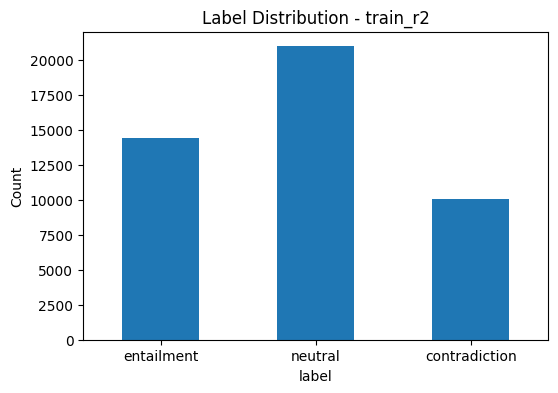

In [ ]:
import matplotlib.pyplot as plt

df_train['label'].value_counts().sort_index().plot(
    kind='bar',
    figsize=(6,4),
    rot=0,
    title="Label Distribution - train_r2"
)
plt.xticks([0,1,2], ['entailment', 'neutral', 'contradiction'])
plt.ylabel("Count")
plt.show()


Text Length Statistics (Premise + Hypothesis)

In [ ]:
df_train["premise_len"] = df_train["premise"].str.split().str.len()
df_train["hypothesis_len"] = df_train["hypothesis"].str.split().str.len()

df_train[["premise_len", "hypothesis_len"]].describe()


,premise_len,hypothesis_len
count,45460.000000,45460.000000
mean,53.997800,9.952178
std,8.163158,5.335210
min,33.000000,3.000000
25%,47.000000,7.000000
50%,54.000000,9.000000
75%,60.000000,11.000000
max,76.000000,65.000000


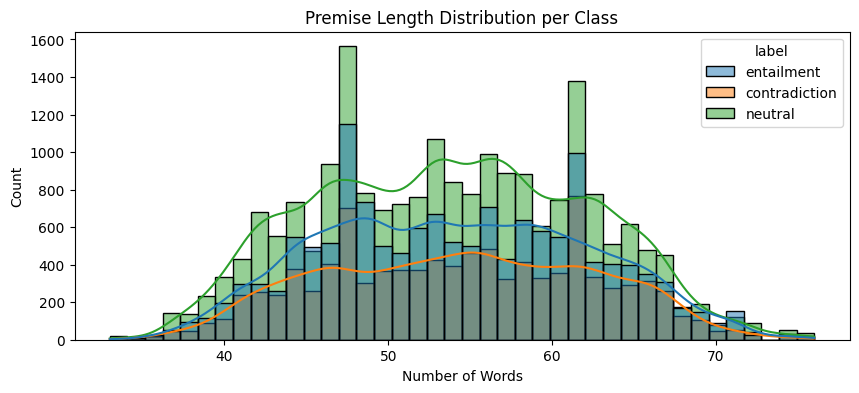

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
sns.histplot(
    data=df_train,
    x="premise_len",
    hue=df_train["label"].map({0:"entailment", 1:"neutral", 2:"contradiction"}),
    kde=True,
    bins=40
)
plt.title("Premise Length Distribution per Class")
plt.xlabel("Number of Words")
plt.show()


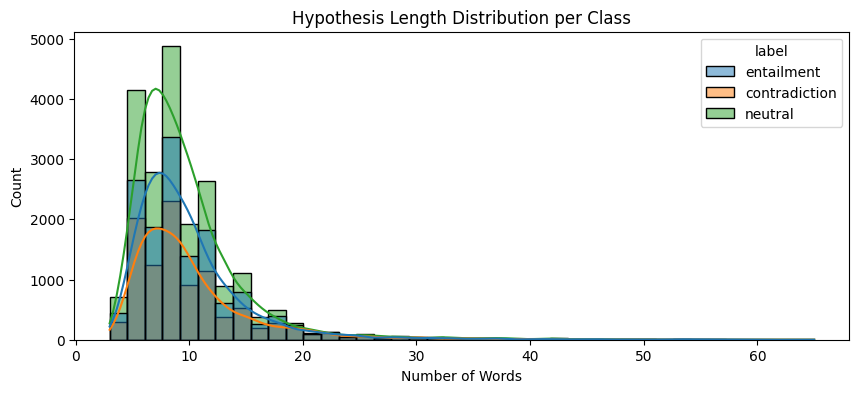

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(
    data=df_train,
    x="hypothesis_len",
    hue=df_train["label"].map({0:"entailment", 1:"neutral", 2:"contradiction"}),
    kde=True,
    bins=40
)
plt.title("Hypothesis Length Distribution per Class")
plt.xlabel("Number of Words")
plt.show()


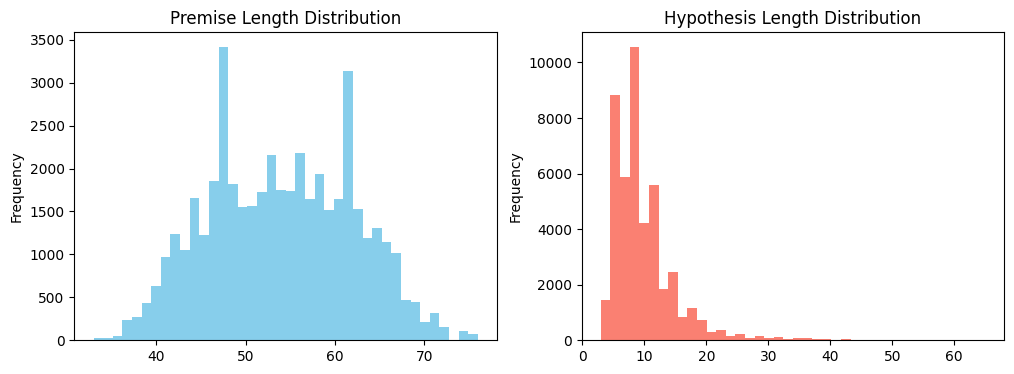

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
df_train["premise_len"].plot(kind="hist", bins=40, color='skyblue')
plt.title("Premise Length Distribution")

plt.subplot(1,2,2)
df_train["hypothesis_len"].plot(kind="hist", bins=40, color='salmon')
plt.title("Hypothesis Length Distribution")

plt.show()


In [ ]:
import random

label_map = {0: "entailment", 1: "neutral", 2: "contradiction"}

for label in [0, 1, 2]:
    print("="*60)
    print("Label:", label_map[label].upper(), "\n")

    ex = df_train[df_train["label"] == label].sample(1).iloc[0]
    print("Premise:\n", ex["premise"], "\n")
    print("Hypothesis:\n", ex["hypothesis"], "\n")
    print("Reason:\n", ex["reason"], "\n")


Label: ENTAILMENT 

Premise:
 Boneyard Beach is a 1995 album by Raleigh, North Carolina band Dish, led by singer and pianist Dana Kletter, on Interscope Records. The album was produced by John Agnello at Ardent Studios in Memphis, Tennessee. Interscope's VP, Tom Whalley, told "Billboard" magazine that "the high quality of songwriting in Dish and the sound of Dana's voice are two things that set this band apart." 

Hypothesis:
 Boneyard Beach released before the world event 9/11 

Reason:
  

Label: NEUTRAL 

Premise:
 Spring Fine Art Exhibition of Leningrad artists (Leningrad, 1954) (Russian: ""Весенняя выставка произведений ленинградских художников 1954 года"" ) become one of the largest Soviet Art Exhibition of 1954 and one of the first Art Exhibitions after Stalin death. The Exhibition took place in Leningrad Union of Soviet Artists Exhibition Halls on Bolshaya Morskaya st. 38. 

Hypothesis:
 Spring Fine Art Exhibition is one of several art shows in Leningrad. 

Reason:
  

Label: C

In [ ]:
df_train.isnull().sum()
(df_train["premise"].str.len() == 0).sum(), \
(df_train["hypothesis"].str.len() == 0).sum(), \
(df_train["reason"].str.len() == 0).sum()


(np.int64(0), np.int64(0), np.int64(40599))

In [ ]:
df_train.groupby("label")[["premise_len","hypothesis_len"]].mean()


,premise_len,hypothesis_len
label,,
0,54.104582,10.038967
1,53.777279,9.763109
2,54.304088,10.221625


# nlp edta

In [ ]:
import nltk
from collections import Counter
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk import ngrams
import string

# 1. Combine premise + hypothesis into one big text blob
all_text = df_train["premise"].tolist() + df_train["hypothesis"].tolist()

# 2. Tokenize all sentences
tokens = []
for text in all_text:
    words = word_tokenize(text.lower())
    tokens.extend(words)

# 3. Remove punctuation + stopwords
stop_words = set(stopwords.words("english"))
punct = set(string.punctuation)

clean_tokens = [word for word in tokens if word not in stop_words and word not in punct and word.isalpha()]

# 4. Count frequencies
word_freq = Counter(clean_tokens)

# 5. Show top 20
word_freq.most_common(20)


[('film', 15388),
 ('american', 12098),
 ('born', 9564),
 ('first', 7790),
 ('known', 7628),
 ('album', 7610),
 ('released', 7284),
 ('also', 7135),
 ('new', 6974),
 ('one', 5967),
 ('united', 5773),
 ('directed', 5261),
 ('series', 5189),
 ('band', 5112),
 ('states', 5007),
 ('football', 4904),
 ('song', 4777),
 ('city', 4767),
 ('played', 4727),
 ('television', 4433)]

In [ ]:
import string

def tokenize(text):
    tokens = nltk.word_tokenize(text.lower())
    return [t for t in tokens if t.isalpha()]

# Combine all text
all_text = df_train["premise"].tolist() + df_train["hypothesis"].tolist()

# Tokenize all sentences
tokens = []
for text in all_text:
    tokens.extend(tokenize(text))


In [ ]:
bigram_freq = Counter(ngrams(tokens, 2))
bigram_freq.most_common(20)


[(('is', 'a'), 30126),
 (('of', 'the'), 28779),
 (('in', 'the'), 25988),
 (('is', 'the'), 8678),
 (('is', 'an'), 8307),
 (('on', 'the'), 8040),
 (('it', 'was'), 7798),
 (('was', 'a'), 7090),
 (('it', 'is'), 6659),
 (('and', 'the'), 6580),
 (('for', 'the'), 5808),
 (('by', 'the'), 5786),
 (('at', 'the'), 5775),
 (('the', 'film'), 5206),
 (('to', 'the'), 5126),
 (('an', 'american'), 4799),
 (('directed', 'by'), 4578),
 (('united', 'states'), 4540),
 (('as', 'the'), 4511),
 (('as', 'a'), 4315)]

In [ ]:
df_train["text_pair"] = df_train["premise"].str.strip().str.lower() + " || " + df_train["hypothesis"].str.strip().str.lower()

df_train["text_pair"].duplicated().sum()



np.int64(42)

The same premise sentence was used multiple times

But each time paired with a different hypothesis

In [ ]:
df_train[df_train["text_pair"].duplicated()].head()


,uid,premise,hypothesis,label,reason,premise_len,hypothesis_len,text_pair
3029,37ac1065-f6c7-4a38-9d26-5ecc27837656,The Monument to Vasil Levski (Bulgarian: Памет...,The monument is not in the centre of Sofia,2,,63,9,the monument to vasil levski (bulgarian: памет...
3331,a6edcb28-13b0-4202-b920-49ceb272bc27,Valentine is a 2001 American slasher film dire...,Valentine will have a sequel.,1,,58,5,valentine is a 2001 american slasher film dire...
3664,d5456dad-388f-4506-a035-241a24474ba0,The Sandlot is a 1993 American coming-of-age b...,It was filmed in Utah.,0,,59,5,the sandlot is a 1993 american coming-of-age b...
3689,e814cd47-1a2f-4861-8b3a-c54e88b8e255,The 1994 Nebraska Cornhuskers football team re...,The 1994 Nebraska Cornhuskers football team wa...,0,,49,11,the 1994 nebraska cornhuskers football team re...
6059,10a758b0-9150-4fa8-8a42-86cbe0b7142c,Living on the Edge (full title Living on the E...,Gérald Leblanc wrote poetry.,0,,61,4,living on the edge (full title living on the e...
